In [36]:
import numpy as np
import pandas as pd
from scipy import stats as sts
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [48]:
# Сгенерируем выборку размера N из стандартного нормального распределения
N = 10**4
norm = sts.norm(0, 1)
X = norm.rvs(N)

In [54]:
# Размеры выборок, для которых будем считать 
# эмпирические функции распределения
sample_size = [10, 25, 50, 100, 1000, N]

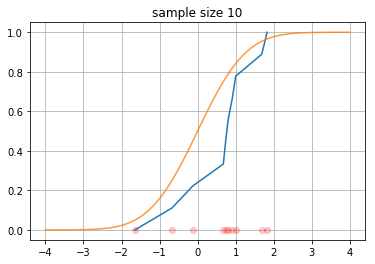

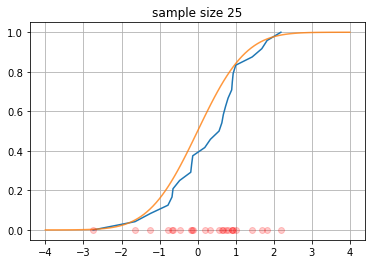

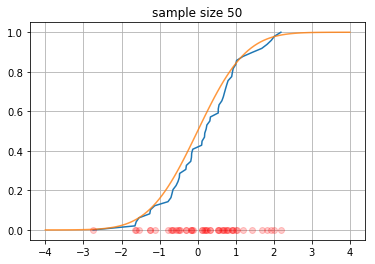

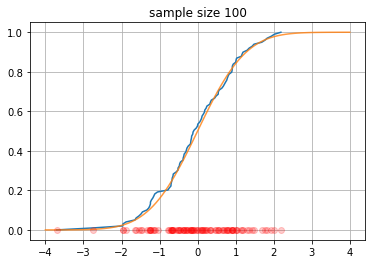

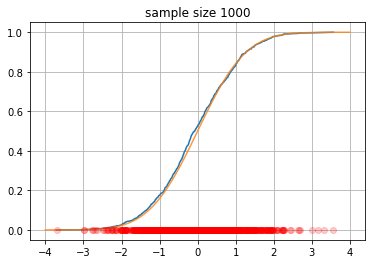

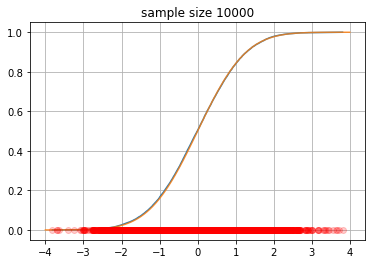

In [51]:
x = np.linspace(-4, 4, 100)
cdf = sts.norm.cdf(x)
# Для каждого размера выборки построим эмпирическую функцию распределения,
# на ось абсцисс нанесем точки соответствующей выборки,
# также построим теоретическую функцию распределения
for n in sample_size:
    plt.subplot()
    plt.grid()
    plt.title('sample size ' + str(n))
    # Функцию распределения сторим следующим образом: 
    # сортируем точки нашей выборки и ставим им в соответствие
    # точки из набора {0, 1/n, 2/n, ... , (n-1)/n, 1}
    plt.plot(sorted(X[:n]), np.array(range(n))/(n-1))
    plt.plot(x, cdf, alpha=0.8)
    plt.plot(X[:(n)], np.zeros(n), 'ro', alpha=0.2)
    plt.show()

Как видим, начиная с выборки размера 100, эмпирическая функция распредения достаточно близка с теоретической

Посчитаем функцию $D_n$, определенную как:

$D_n = \sup_{x \in R} |F_n(x) - F(x)|$

In [57]:
D = []
for n in range(2, N):
    F_n = np.array(range(n))/(n - 1)
    F = sts.norm.cdf(sorted(X[:n]))
    D.append( max( map(lambda i: abs(F_n[i] - F[i]), range(n) ) ) )

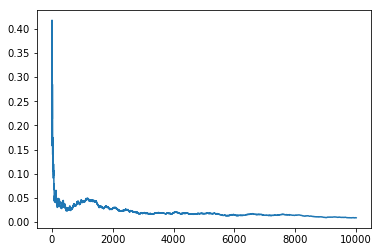

In [60]:
# Построим график полученной статистики
plt.plot(range(N - 2), D)

Как видим, эта статистика действительно сходится.

In [61]:
# Посчитаем теперь статистику sqrt(n)*D_n
D1 = list(map(lambda n: math.sqrt(n)*D[n], range(N - 2) ))

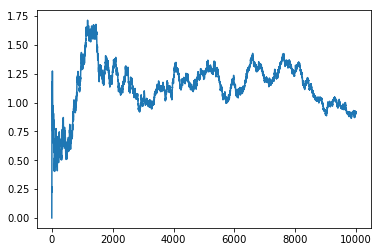

In [63]:
# Построим ее график:
plt.plot(range(N - 2), D1)

Эта статистика не сходится.